In [1]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import datetime as dt

In [2]:
host='172.28.172.33'
port=3306
user='olivier'
password='molecules'
db='environmental_monitoring'

In [3]:
query = "SELECT * FROM vertiv_room"
conn= pymysql.connect(host=host, port=port, user=user, password=password, db=db)

c = conn.cursor()
c.execute(query)
data = c.fetchall()
conn.commit()
c.close()

In [4]:
timestamp = [d[0] for d in data]
chilled_water = [float(d[1]) for d in data]
hot_water = [float(d[2]) for d in data]
intake_air = [float(d[3]) for d in data]

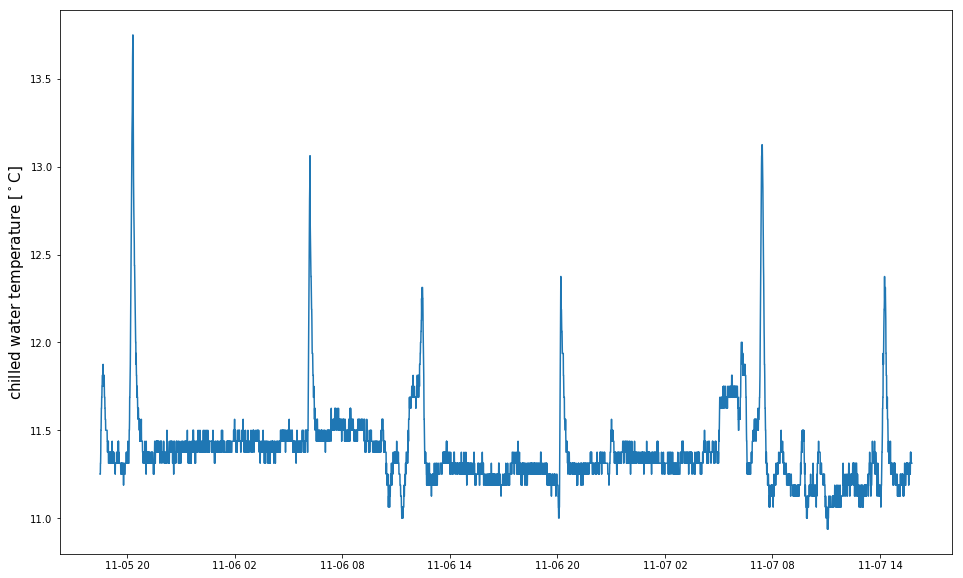

In [114]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(timestamp, chilled_water)
ax.set_ylabel(r'chilled water temperature [$^\circ$C]', fontsize = 15);
fig.savefig('chilledwater.png', dpi = 150)

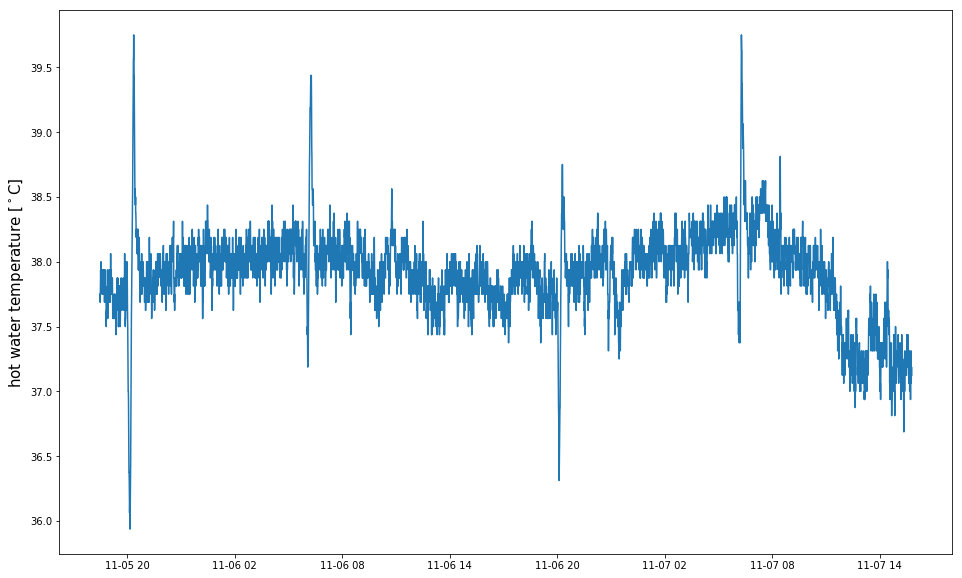

In [111]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(timestamp, hot_water)
ax.set_ylabel(r'hot water temperature [$^\circ$C]', fontsize = 15);
fig.savefig('hotwater.png', dpi = 150)

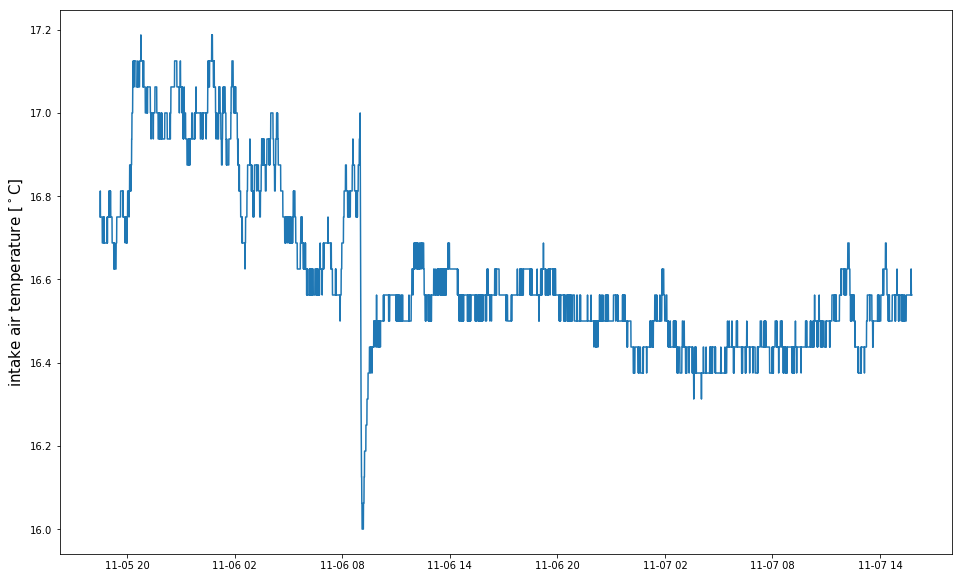

In [112]:
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(timestamp, intake_air)
ax.set_ylabel(r'intake air temperature [$^\circ$C]', fontsize = 15);
fig.savefig('intakeair.png', dpi = 150)

In [8]:
data_dir = '../Data/'

In [9]:
conn = sqlite3.connect(data_dir + 'temperaturelog.db', detect_types=sqlite3.PARSE_DECLTYPES)
conn.row_factory = lambda cursor, row: row[0]
c = conn.cursor()
c.execute("SELECT temp FROM temps WHERE id=1")
spl8_lasertable1 = c.fetchall()
c.execute("SELECT temp FROM temps WHERE id=2")
spl8_main = c.fetchall()
c.execute("SELECT timestamp FROM temps WHERE id=1")
timestamp_main = c.fetchall()
c.execute("SELECT timestamp FROM temps WHERE id=2")
timestamp_lasertable1 = c.fetchall()
c.close()
conn.close()

In [10]:
conn = sqlite3.connect(data_dir + 'temperaturelog.db', detect_types=sqlite3.PARSE_DECLTYPES)
c = conn.cursor()
c.execute("SELECT * FROM vertiv")
names = [val[0] for val in c.description]
data = c.fetchall()
c.close()
conn.close()

In [11]:
timestamp_vertiv = [d[0] for d in data]
returntemp = [d[1] for d in data]

In [12]:
import pytz

def convert_timezone(timestamp):
    utc = pytz.timezone('UTC')
    eastern = pytz.timezone('US/Eastern')
    return utc.localize(timestamp).astimezone(eastern)

eastern = pytz.timezone('US/Eastern')

timestamp_vertiv = [convert_timezone(t) for t in timestamp_vertiv]
timestamp_main = [convert_timezone(t) for t in timestamp_main]
timestamp_lasertable1 = [convert_timezone(t) for t in timestamp_lasertable1]
timestamp = [eastern.localize(t) for t in timestamp]

In [58]:
def select_data(ts, data, start, stop):
    mask = (ts >= start) & (ts <= stop)
    return ts[mask], data[mask]

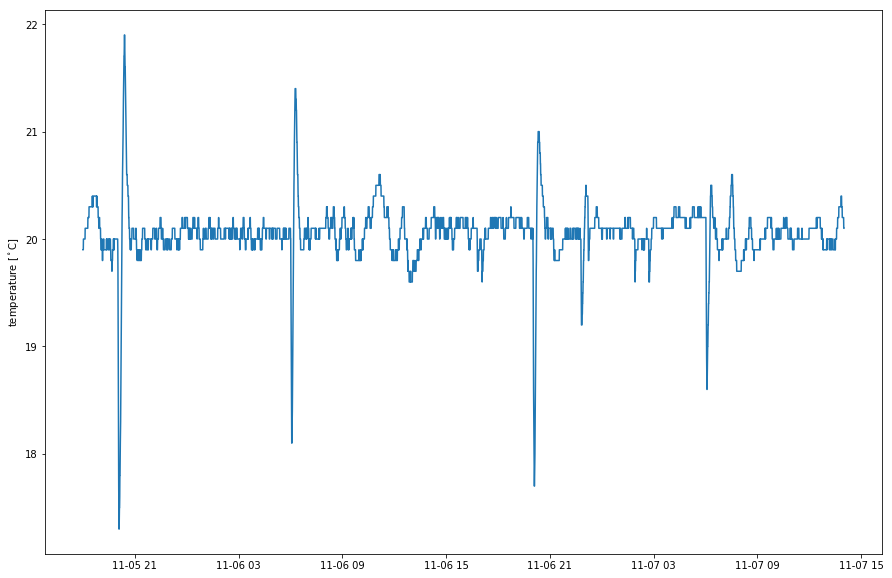

In [117]:
start = eastern.localize(dt.datetime(2018,11,5,18))
stop = eastern.localize(dt.datetime(2018,11,7,14))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, d, label = 'SPL8')

ax.set_ylabel(r'temperature [$^\circ$C]')
fig.savefig('SPL8.png', dpi =150)

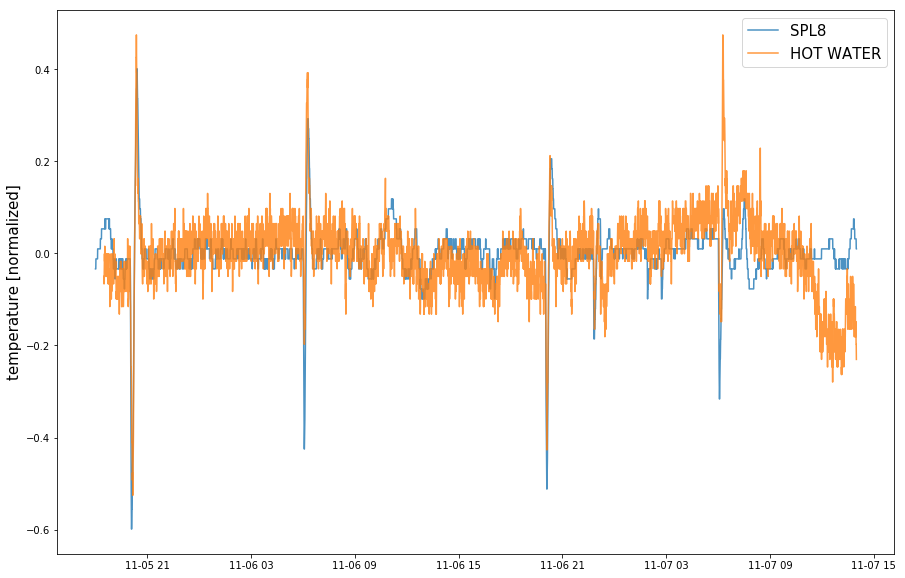

In [115]:
start = eastern.localize(dt.datetime(2018,11,5,18))
stop = eastern.localize(dt.datetime(2018,11,7,14))

normalize = lambda x: (x-np.mean(x))/np.ptp(x)

select = lambda ts, data: select_data(np.array(ts), np.array(data), start, stop)

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8')

# ts, d = select(timestamp_lasertable1, spl8_lasertable1)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 LASERTABLE1')

# ts, d = select(timestamp_main, spl8_main)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 MAIN')

ts, d = select(timestamp, hot_water)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'HOT WATER')

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_hotwater.png', dpi = 150)

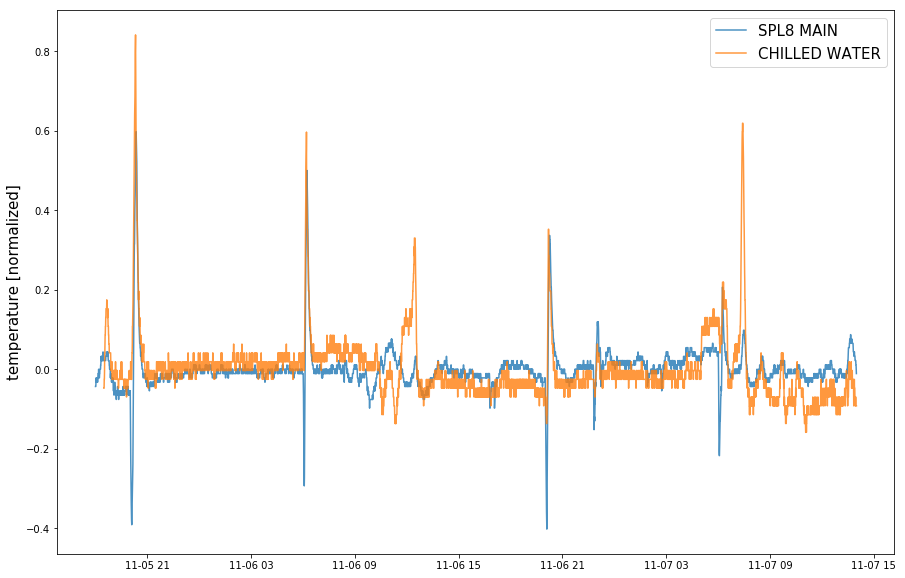

In [93]:
fig, ax = plt.subplots(figsize = (15,10))

# ts, d = select(timestamp_vertiv, returntemp)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8')

# ts, d = select(timestamp_lasertable1, spl8_lasertable1)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 LASERTABLE1')

ts, d = select(timestamp_main, spl8_main)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 MAIN')

ts, d = select(timestamp, chilled_water)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'CHILLED WATER')

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15)
fig.savefig('temperature_chilledwater.png', dpi = 150)

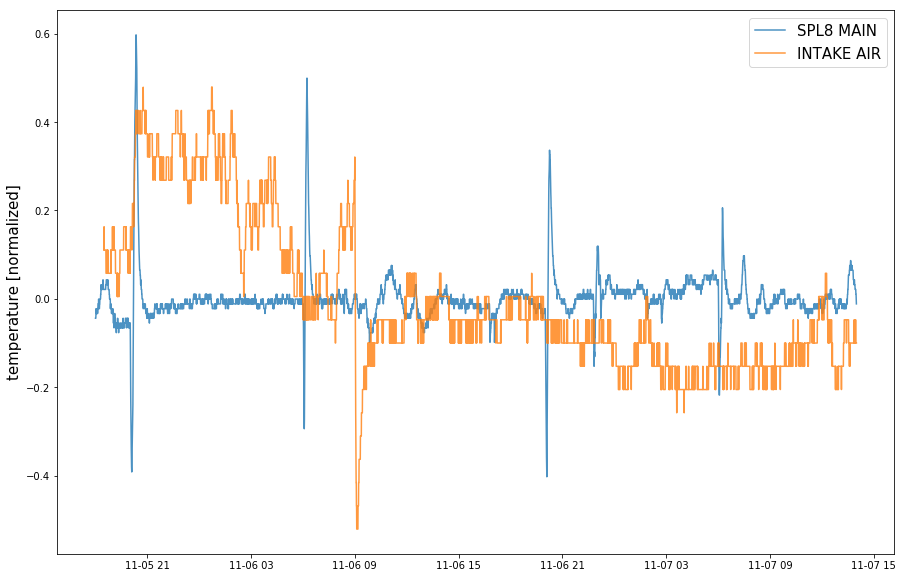

In [94]:
fig, ax = plt.subplots(figsize = (15,10))

# ts, d = select(timestamp_vertiv, returntemp)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8')

# ts, d = select(timestamp_lasertable1, spl8_lasertable1)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 LASERTABLE1')

ts, d = select(timestamp_main, spl8_main)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 MAIN')

ts, d = select(timestamp, intake_air)
ax.plot(ts, normalize(d), alpha = 0.8, label = 'INTAKE AIR')

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15)
fig.savefig('temperature_intakeair.png', dpi = 150)

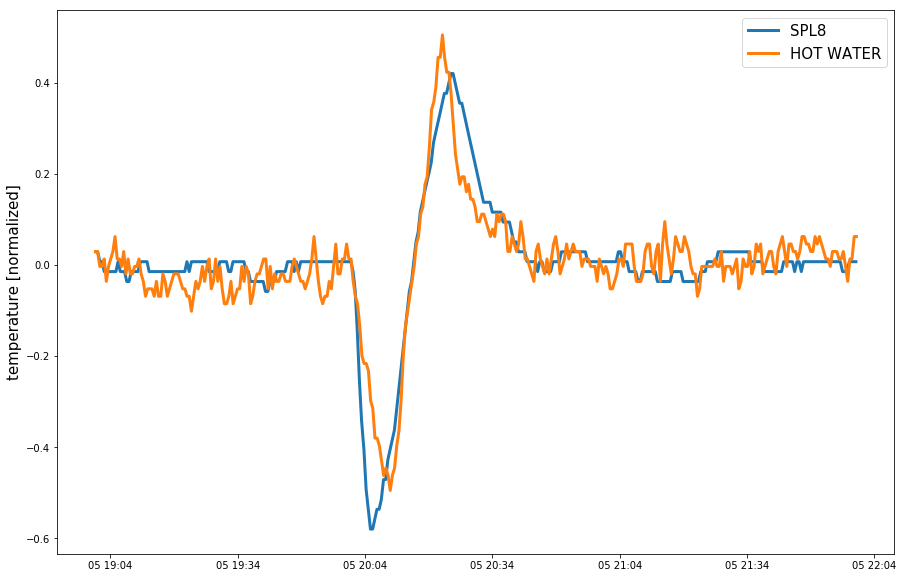

In [118]:
start = eastern.localize(dt.datetime(2018,11,5,19))
stop = eastern.localize(dt.datetime(2018,11,5,22))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

# ts, d = select(timestamp_lasertable1, spl8_lasertable1)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 LASERTABLE1')

# ts, d = select(timestamp_main, spl8_main)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 MAIN')

ts, d = select(timestamp, hot_water)
ax.plot(ts, normalize(d), label = 'HOT WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_hotwater_zoom1.png', dpi = 150)

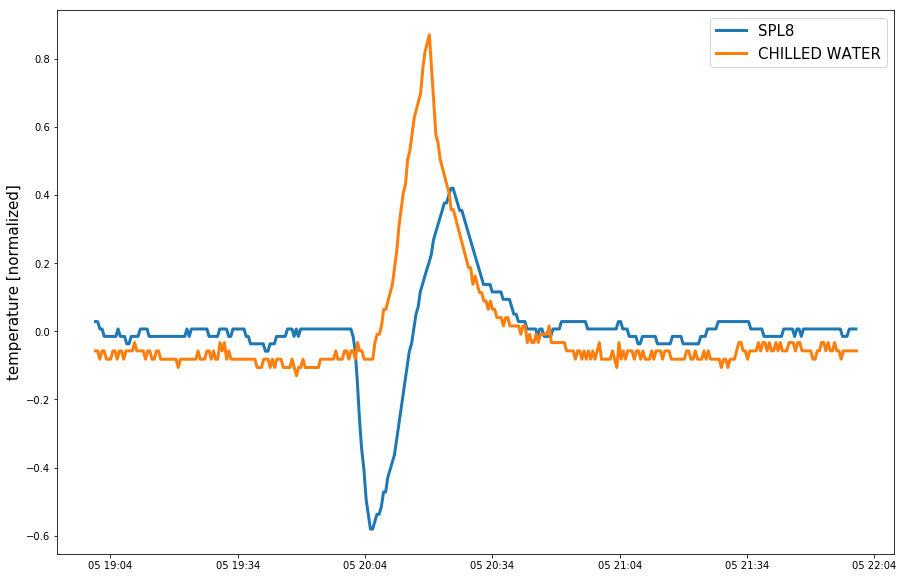

In [119]:
start = eastern.localize(dt.datetime(2018,11,5,19))
stop = eastern.localize(dt.datetime(2018,11,5,22))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

# ts, d = select(timestamp_lasertable1, spl8_lasertable1)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 LASERTABLE1')

# ts, d = select(timestamp_main, spl8_main)
# ax.plot(ts, normalize(d), alpha = 0.8, label = 'SPL8 MAIN')

ts, d = select(timestamp, chilled_water)
ax.plot(ts, normalize(d), label = 'CHILLED WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_chilledwater_zoom1.png', dpi = 150);

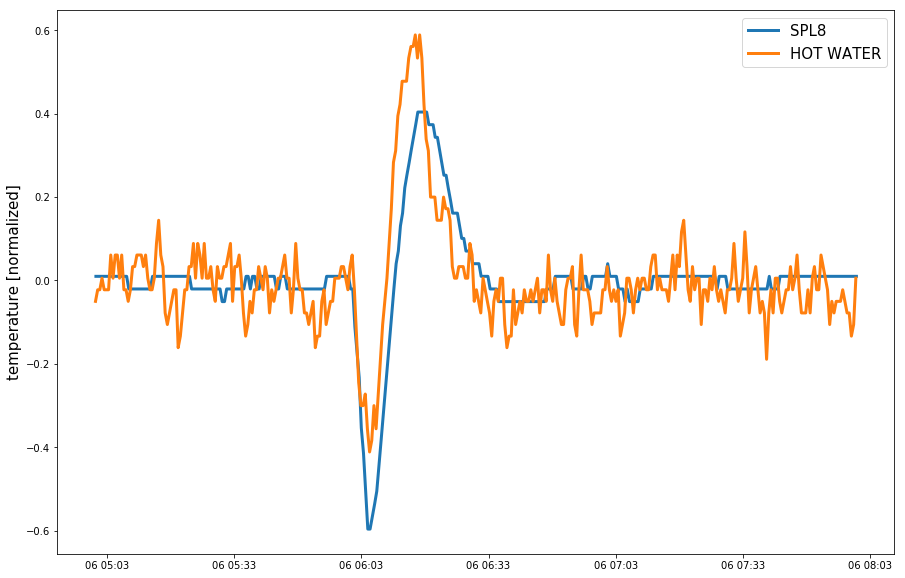

In [120]:
start = eastern.localize(dt.datetime(2018,11,6,5))
stop = eastern.localize(dt.datetime(2018,11,6,8))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, hot_water)
ax.plot(ts, normalize(d), label = 'HOT WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_hotwater_zoom2.png', dpi = 150)

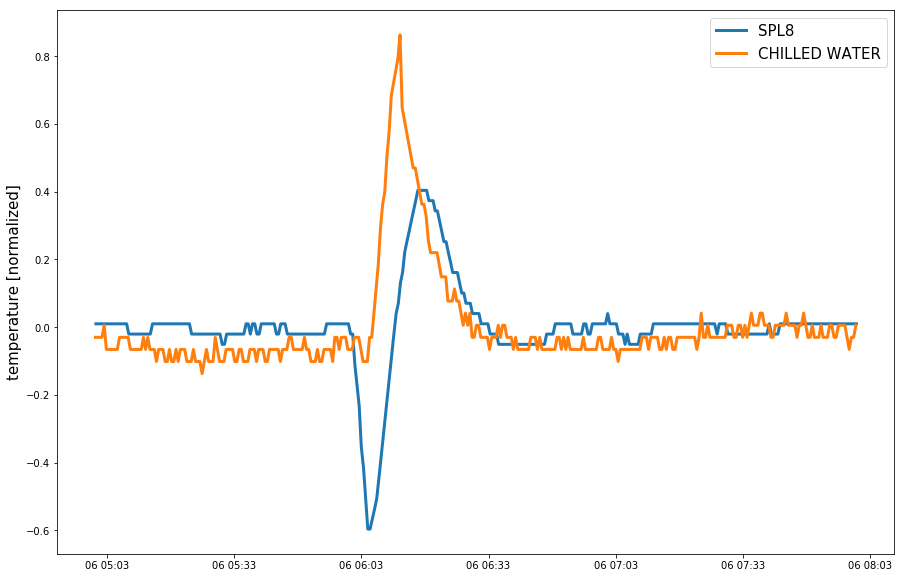

In [121]:
fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, chilled_water)
ax.plot(ts, normalize(d), label = 'CHILLED WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_chilledwater_zoom2.png', dpi = 150);

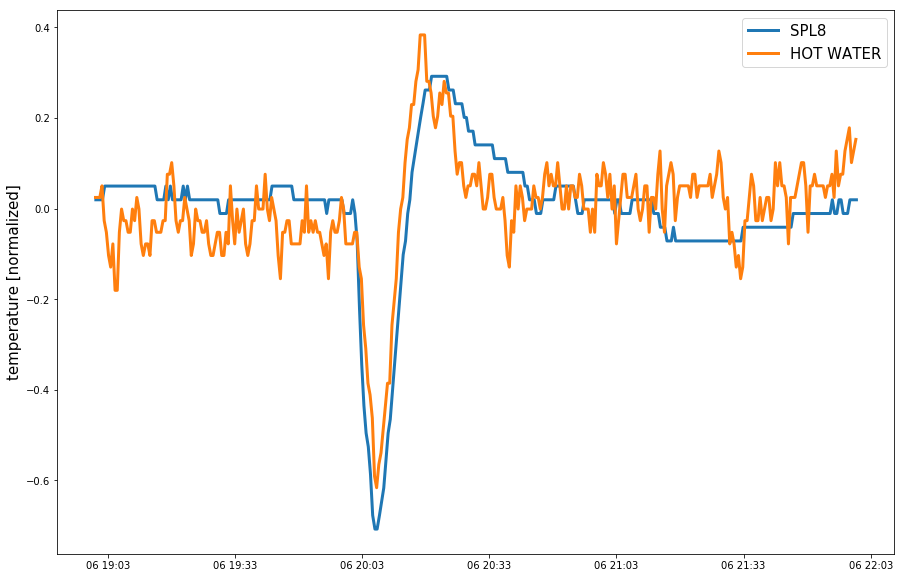

In [122]:
start = eastern.localize(dt.datetime(2018,11,6,19))
stop = eastern.localize(dt.datetime(2018,11,6,22))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, hot_water)
ax.plot(ts, normalize(d), label = 'HOT WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_hotwater_zoom3.png', dpi = 150)

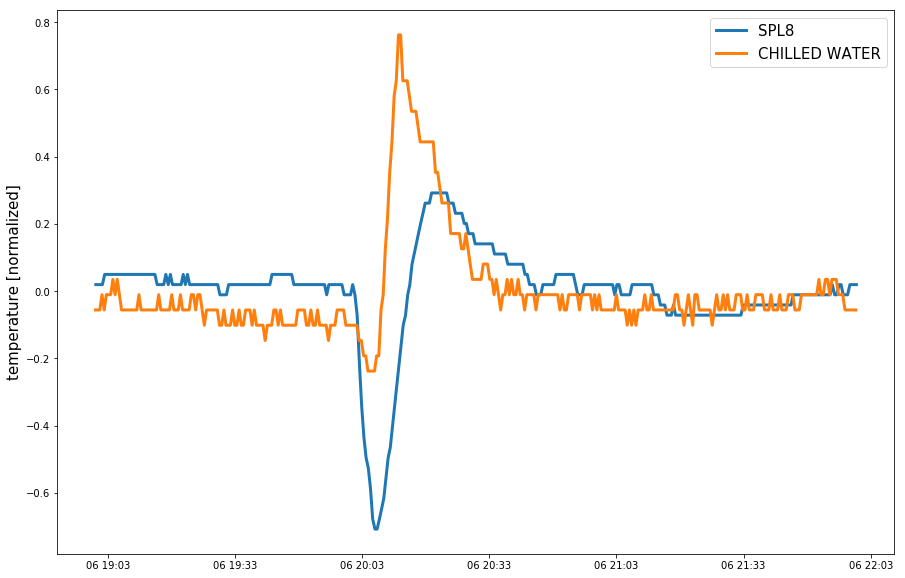

In [123]:
fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, chilled_water)
ax.plot(ts, normalize(d), label = 'CHILLED WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_chilledwater_zoom3.png', dpi = 150);

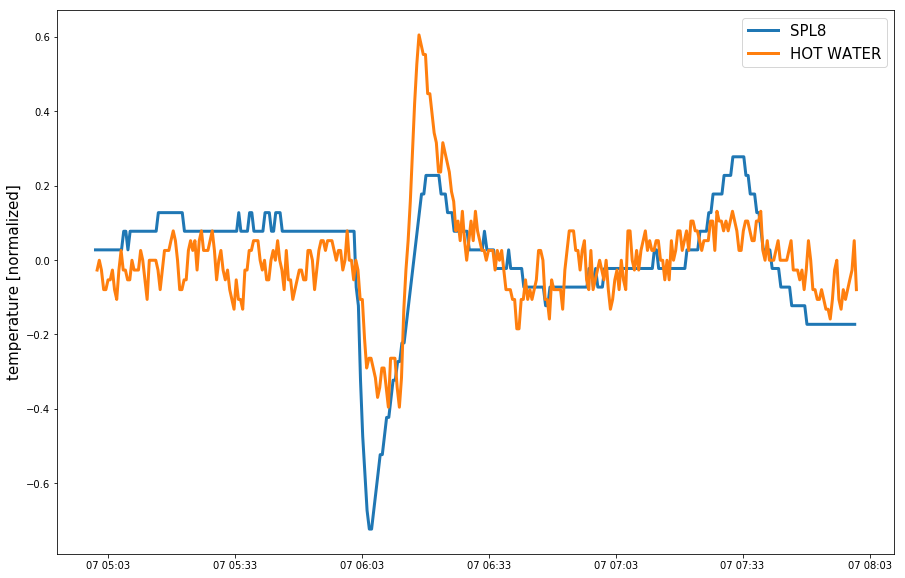

In [124]:
start = eastern.localize(dt.datetime(2018,11,7,5))
stop = eastern.localize(dt.datetime(2018,11,7,8))

fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, hot_water)
ax.plot(ts, normalize(d), label = 'HOT WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_hotwater_zoom4.png', dpi = 150)

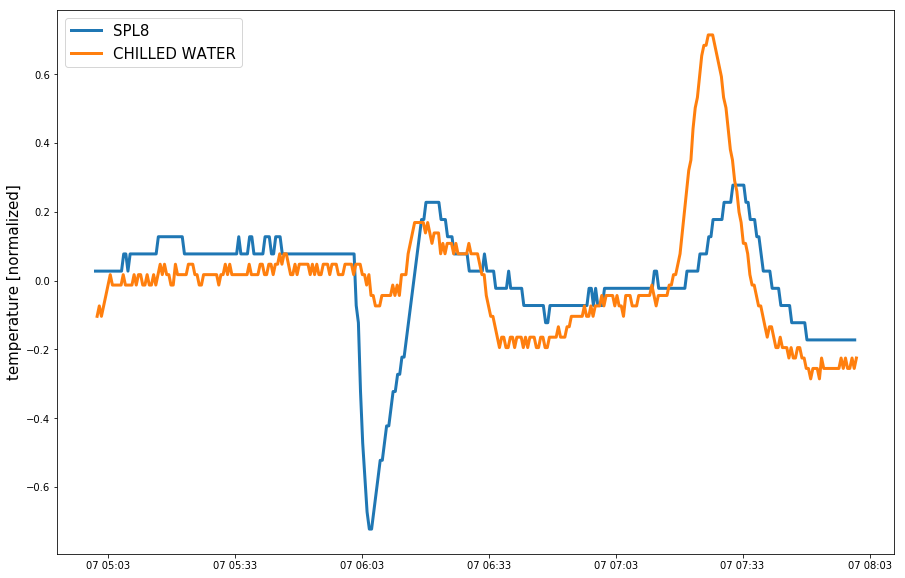

In [125]:
fig, ax = plt.subplots(figsize = (15,10))

ts, d = select(timestamp_vertiv, returntemp)
ax.plot(ts, normalize(d), label = 'SPL8', lw = 3)

ts, d = select(timestamp, chilled_water)
ax.plot(ts, normalize(d), label = 'CHILLED WATER', lw = 3)

ax.legend(fontsize = 15);
ax.set_ylabel('temperature [normalized]', fontsize = 15);
fig.savefig('temperature_chilledwater_zoom4.png', dpi = 150);

In [131]:
max(chilled_water)

13.75